In [ ]:
# Netflix Data Science Project
# By: Zachary Delk
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Downloading and Storing Dataset
working_path = kagglehub.dataset_download("shivamb/netflix-shows")
file_path = working_path + "/netflix_titles.csv"
df = pd.read_csv(file_path)

# Inspecting Data
print(df.head(3))
print(df.info())

  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                

In [3]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')
df.dtypes

df[df == 'Not Given'] = np.nan

In [4]:
# Converting Categories to lists    
df['listed_in_list'] = df['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x])
print(df['listed_in_list'].head())

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: listed_in_list, dtype: object


In [5]:
# Using the column of lists to make a Category dictionary
cat_dict = {}
for show in df['listed_in_list']:
    for cat in show:
        if cat in cat_dict:
            cat_dict[cat] += 1
        else:
            cat_dict[cat] = 1

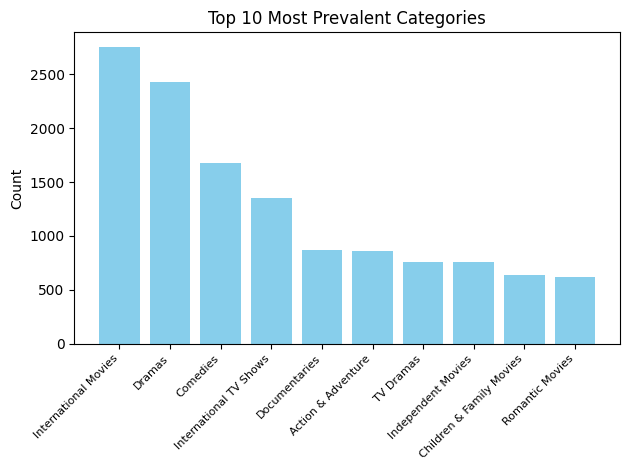

In [6]:
# Sorting Dictionary and Looking at 10 Most Prevalent Categories
sorted_items = sorted(cat_dict.items(), key=lambda item: item[1], reverse=True)
top_10_cats = sorted_items[:10]
# print(top_10_cats)
categories, counts = zip(*top_10_cats)
plt.bar(x=categories, height=counts, color = 'skyblue')
plt.title('Top 10 Most Prevalent Categories')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.tight_layout()

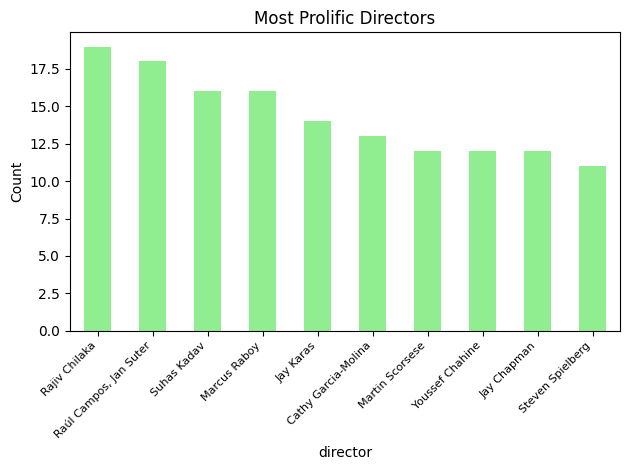

In [7]:


directors = df['director']
top_10_dir = directors.value_counts()[:10]
top_10_dir.plot.bar(color='lightgreen')
plt.title('Most Prolific Directors')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.tight_layout()


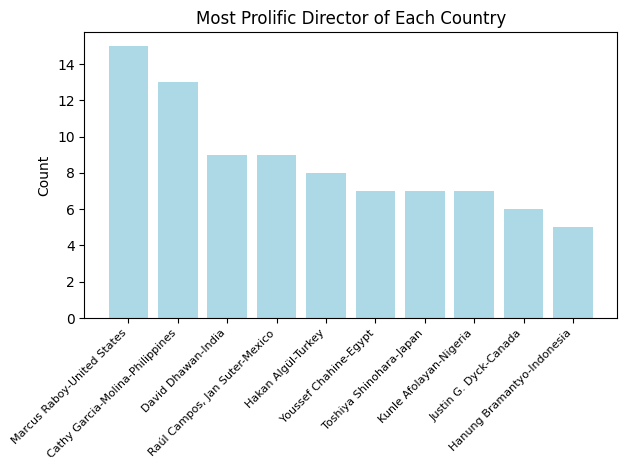

In [ ]:
# Who is/are the most prolific directors for each country?
df_sub_dc = df.dropna(subset=['director','country'])
director_count = df_sub_dc.groupby(['country', 'director']).size().reset_index(name='count')
most_prolific = director_count.sort_values('count', ascending=False).drop_duplicates('country')

most_prolific['dir_country'] = most_prolific['director'] + '-' + most_prolific['country']


plt.bar(x=most_prolific['dir_country'].head(10), height=most_prolific['count'].head(10), color='lightblue')
plt.title('Most Prolific Director of Each Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.tight_layout()

In [15]:
df_sub_dt = df.dropna(subset=['director', 'type'])
direct_type_count = df_sub_dc.groupby('director')['type'].nunique()
directors_both = direct_type_count[direct_type_count == 2].index.tolist()

In [17]:
len(directors_both)

35